# Exercise
Practice training a deep neural network on the CIFAR10 image dataset:
1. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the Swish activation function.
2. Using Nadam optimization and early stopping, train the network on the
CIFAR10 dataset. You can load it with tf.keras.datasets.cifar10.load_
data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000
for training, 10,000 for testing) with 10 classes, so you’ll need a softmax
output layer with 10 neurons. Remember to search for the right learning rate
each time you change the model’s architecture or hyperparameters.
3. Now try adding batch normalization and compare the learning curves: is it
converging faster than before? Does it produce a better model? How does it
affect training speed?
4. Try replacing batch normalization with SELU, and make the necessary adjustments
to ensure the network self-normalizes (i.e., standardize the input features,
use LeCun normal initialization, make sure the DNN contains only a
sequence of dense layers, etc.).
5. Try regularizing the model with alpha dropout. Then, without retraining your
model, see if you can achieve better accuracy using MC dropout.

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
[len(arr) for arr in (X_train, y_train, X_valid, y_valid, X_test, y_test)]

[45000, 45000, 5000, 5000, 10000, 10000]

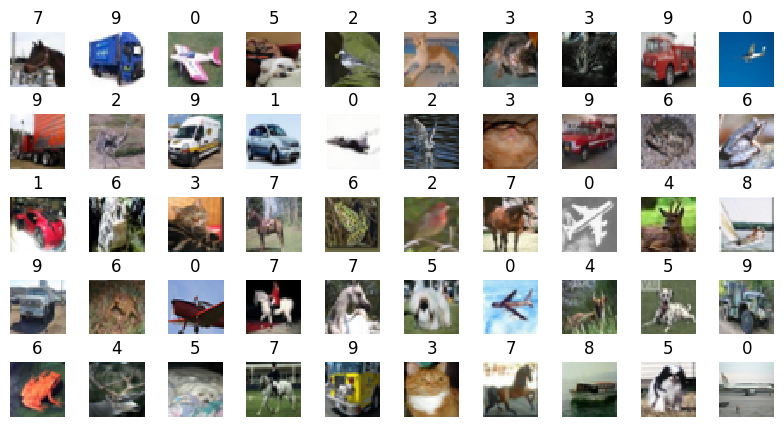

In [4]:
n_rows: int = 5
n_cols: int = 10
plt.figure(figsize= (n_cols, n_rows))

for row in range(n_rows):
    for col in range(n_cols):
        index: int = n_cols * row + col + 1
        plt.subplot(n_rows, n_cols, index)
        plt.imshow(X_train[index], interpolation= 'nearest')
        plt.axis('off')
        plt.title(y_train[index][0])
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape= [32, 32, 3]))
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation= 'swish', kernel_initializer= 'he_normal'))

model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

In [7]:
optimizer = tf.keras.optimizers.Nadam(learning_rate= 5e-5)
model.compile(
    loss= 'sparse_categorical_crossentropy',
    optimizer= optimizer,
    metrics= ['accuracy']
)

In [8]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience= 20, restore_best_weights= True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_cifar10_model.keras', save_best_only=True)

run_index = 1     # increment every time train the model
run_logdir = Path() / 'my_cifar10_logs' / f'run_{run_index}'
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [9]:
model.fit(
    X_train, y_train, 
    epochs= 100,
    validation_data= (X_valid, y_valid),
    callbacks= callbacks
)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.1212 - loss: 10.0804 - val_accuracy: 0.2048 - val_loss: 2.1931
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2081 - loss: 2.1538 - val_accuracy: 0.2454 - val_loss: 2.0387
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2474 - loss: 2.0328 - val_accuracy: 0.2798 - val_loss: 1.9561
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2825 - loss: 1.9535 - val_accuracy: 0.2970 - val_loss: 1.9027
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3085 - loss: 1.8878 - val_accuracy: 0.3262 - val_loss: 1.8176
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3334 - loss: 1.8253 - val_accuracy: 0.3484 - val_loss: 1.7621
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3549 - loss: 1.7781 - val_accuracy: 0.3700 - val_loss: 1.7390
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3695 - loss:

In [10]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4486 - loss: 1.5965


[1.5918006896972656, 0.44679999351501465]

In [28]:
# for downloading the working directory to use tensorflow on my system
import subprocess

subprocess.run(["zip", "-r", "working_dir.zip", "/kaggle/working"], stdout= subprocess.DEVNULL)

CompletedProcess(args=['zip', '-r', 'working_dir.zip', '/kaggle/working'], returncode=0)

In [12]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape= [32, 32, 3]))
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer= 'he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('swish'))

model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

In [13]:
optimizer = tf.keras.optimizers.Nadam(learning_rate= 5e-4)
model.compile(
    loss= 'sparse_categorical_crossentropy',
    optimizer= optimizer,
    metrics= ['accuracy'])

In [14]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience= 20, restore_best_weights= True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_cifar10_bn_model.keras', save_best_only=True)

run_index += 1
run_logdir = Path() / 'my_cifar10_logs' / f'run_{run_index}'
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [15]:
history = model.fit(
    X_train, y_train, 
    epochs= 100,
    validation_data= (X_valid, y_valid),
    callbacks= callbacks
)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.1797 - loss: 2.2241 - val_accuracy: 0.3372 - val_loss: 1.8326
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3418 - loss: 1.8248 - val_accuracy: 0.2994 - val_loss: 1.9509
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3952 - loss: 1.6923 - val_accuracy: 0.3662 - val_loss: 1.7834
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4301 - loss: 1.5969 - val_accuracy: 0.3744 - val_loss: 1.7321
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4625 - loss: 1.5180 - val_accuracy: 0.4184 - val_loss: 1.6434
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4864 - loss: 1.4459 - val_accuracy: 0.4076 - val_loss: 1.6694
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5166 - loss: 1.3774 - val_accuracy: 0.3956 - val_loss: 1.7485
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5391 - loss:

In [16]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4239 - loss: 1.6319


[1.643426775932312, 0.41839998960494995]

In [17]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape= [32, 32, 3]))
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer= "lecun_normal", activation= "selu"))

model.add(tf.keras.layers.Dense(10, activation= "softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate= 7e-4)
model.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer= optimizer,
    metrics= ["accuracy"]
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience= 20, restore_best_weights= True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.keras", save_best_only= True)

run_index += 1 
run_logdir = Path() / 'my_cifar10_logs' / f'run_selu_{run_index}'
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis= 0)
X_stds = X_train.std(axis= 0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

history = model.fit(
    X_train_scaled, y_train, 
    epochs= 100,
    validation_data= (X_valid_scaled, y_valid),
    callbacks= callbacks
)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.2728 - loss: 2.0399 - val_accuracy: 0.3520 - val_loss: 1.7924
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3842 - loss: 1.7275 - val_accuracy: 0.4156 - val_loss: 1.6630
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4239 - loss: 1.6262 - val_accuracy: 0.4238 - val_loss: 1.6517
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4501 - loss: 1.5697 - val_accuracy: 0.4368 - val_loss: 1.5898
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4758 - loss: 1.5078 - val_accuracy: 0.4608 - val_loss: 1.5313
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4936 - loss: 1.4582 - val_accuracy: 0.4666 - val_loss: 1.5208
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5125 - loss: 1.4128 - val_accuracy: 0.4694 - val_loss: 1.5341
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5315 - loss: 

[1.5208097696304321, 0.4666000008583069]

In [21]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape= [32, 32, 3]))
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer= "lecun_normal", activation= "selu"))

model.add(tf.keras.layers.Dropout(rate= 0.1))    # alpha dropout is deprecated
model.add(tf.keras.layers.Dense(10, activation= "softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate= 5e-4)
model.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer= optimizer,
    metrics= ["accuracy"]
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience= 20, restore_best_weights= True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_alpha_model.keras", save_best_only= True)

run_index += 1 
run_logdir = Path() / 'my_cifar10_logs' / f'run_{run_index}'
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

history = model.fit(
    X_train_scaled, y_train, 
    epochs= 100,
    validation_data= (X_valid_scaled, y_valid),
    callbacks= callbacks
)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.2659 - loss: 2.0801 - val_accuracy: 0.3772 - val_loss: 1.7280
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3830 - loss: 1.7318 - val_accuracy: 0.4240 - val_loss: 1.6715
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4314 - loss: 1.6105 - val_accuracy: 0.4602 - val_loss: 1.5781
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4608 - loss: 1.5312 - val_accuracy: 0.4680 - val_loss: 1.5272
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4964 - loss: 1.4599 - val_accuracy: 0.4826 - val_loss: 1.5300
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5170 - loss: 1.4022 - val_accuracy: 0.4872 - val_loss: 1.5140
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5328 - loss: 1.3547 - val_accuracy: 0.4934 - val_loss: 1.5205
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5456 - loss: 

[1.5139920711517334, 0.487199991941452]

In [23]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [24]:
mc_model = tf.keras.Sequential([
    (
        MCDropout(layer.rate)
        if isinstance(layer, tf.keras.layers.Dropout)
        else layer
    )
    for layer in model.layers
])

In [26]:
def mc_dropout_predict_probas(
    mc_model: tf.keras.Model, 
    X: np.ndarray, 
    n_samples: int = 10
) -> np.ndarray:
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis= 0)

def mc_dropout_predict_classes(
    mc_model: tf.keras.Model, 
    X: np.ndarray, 
    n_samples= 10
) -> np.ndarray:
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis= 1)

In [27]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.486